# House Prices Prediction 

## Import the library

In [1]:
#import tensorflow as tf
#import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# to print large numbers with spaces as thousand seperator:
import locale
locale.setlocale(locale.LC_ALL, '')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

## Load the dataset


In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('./res/processed_train.csv')
df_test = pd.read_csv('./res/processed_test.csv')

df_train.name = 'Training Set'
df_test.name = 'Test Set'

test_ids = df_test.pop('Unnamed: 0')

target_var_name = 'SalePrice'
df_target = df_train[[target_var_name]]
df_train.drop(target_var_name, inplace = True, axis = 1)

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_target.shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 1460
Number of Test Examples = 1459

Training X Shape = (1460, 43)
Training y Shape = 1460

Test X Shape = (1459, 42)
Test y Shape = 1459

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'TotalBsmtSF', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'SaleType', 'PorchTotalSF', 'ProxCondition_Norm',
       'BldgType_Is_1Fam', 'Heating_Is_GasA', 'HeatingQC_Is_OK'],
      dtype='object')
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', '

The data is composed of 42 features and an Id column, and 1 target variable;

In [3]:
df_train.head(3)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,SaleType,PorchTotalSF,ProxCondition_Norm,BldgType_Is_1Fam,Heating_Is_GasA,HeatingQC_Is_OK
0,0,60,FV_or_RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,False,4_or_2,Y,0,Other,61,True,True,True,True
1,1,20,FV_or_RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,True,4_or_2,Y,298,Other,0,False,True,True,True
2,2,60,FV_or_RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,True,4_or_2,Y,0,Other,42,True,True,True,True


We will drop the `Id` column as it is not necessary for model training.

In [4]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_train.head(3)

dfs = [df_train, df_test]

df_all = concat_df(df_train, df_test)
df_all.name = 'All Set' 

We can inspect the types of feature columns using the following code:

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   MSZoning            1460 non-null   object 
 2   LotFrontage         1201 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   Street              1460 non-null   object 
 5   Alley               1460 non-null   object 
 6   LotShape            1460 non-null   object 
 7   LandContour         1460 non-null   object 
 8   Utilities           1460 non-null   object 
 9   LotConfig           1460 non-null   object 
 10  LandSlope           1460 non-null   object 
 11  Neighborhood        1460 non-null   object 
 12  HouseStyle          1460 non-null   object 
 13  OverallQual         1460 non-null   object 
 14  OverallCond         1460 non-null   object 
 15  RoofStyle           1460 non-null   object 
 16  Exteri

# Let's perform imputing

Some features have NAs or NaNs. In some cases, this is expected has the value in one feature can imply a missing value for another one (ex: no garage in a home therefore NA for Garage Surface)
So we should encode the category as None to suit accordingly.

These variables are:

In [ ]:
from sklearn.impute import KNNImputer



In [ ]:
missing_vals = df_all.isna().mean().sort_values()
for col in missing_vals.keys():
    print(col, missing_vals[col])

In [ ]:
not_applicable_features = ['LotFrontage', 'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea', 'PoolQC', 'Fence', 'MiscFeature', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']

# every feature that is missing values that is not in the previous list has 'actually' missing values for unexpected reasons

for feature in not_applicable_features:
    # let's fill the missing values with:
    # - 0 if the type of df_all[feature] is numerical
    # - 'NA' if not
    if df_all[feature].dtype in ['int64', 'float64']:  # Check if the feature is numerical
        df_all[feature].fillna(0, inplace=True)
    else:
        df_all[feature].fillna('NA', inplace=True)

In [ ]:
missing_vals = df_all.isna().mean().sort_values()
for col in missing_vals.keys():
    print(col, missing_vals[col])

In [ ]:
# these still have actual missing values:
"""
Exterior2nd 0.00034258307639602604
Electrical 0.00034258307639602604
SaleType 0.00034258307639602604
KitchenQual 0.00034258307639602604
Exterior1st 0.00034258307639602604
Functional 0.0006851661527920521
Utilities 0.0006851661527920521
MSZoning 0.0013703323055841042
"""

# we should be able to find sensible values to fill in given their very low quantity
outstanding_missing_vals = ['Exterior2nd',
'Electrical',
'SaleType', 
'KitchenQual',
'Exterior1st', 
'Functional', 
'Utilities', 
'MSZoning']

In [ ]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


for col in outstanding_missing_vals:
    non_missing = df_all.loc[df_all[col].notna()]
    missing = df_all.loc[df_all[col].isna()]

    X_train = non_missing.drop(columns = [col])
    X_missing = missing.drop(columns = [col])
    y_train = non_missing[col]

    encoders = {}
    for c in X_train.columns:
        if X_train[c].dtype != np.float64 and X_train[c].dtype != np.int64:
            #print(c)
            encoders[c] = LabelEncoder()
            # a categorical variable
            X_train.loc[:, c] = encoders[c].fit_transform(X_train[c])
            X_missing.loc[:, c] = encoders[c].fit_transform(X_missing[c])


    model = tree.DecisionTreeClassifier()
    #print(X_train)
    model.fit(X_train, y_train)

    predictions = model.predict(X_missing)

    df_all.loc[df_all[col].isna(), col] = predictions


# So we have now imputed missing values using NAs when approrpiate, or with a Decision Tree prediction in the other very few cases


In [ ]:
missing_vals = df_all.isna().mean().sort_values()
for col in missing_vals.keys():
    print(col, missing_vals[col])

In [ ]:
# Now let's resplit the df_all into train and test :
df_train = df_all.loc[:df_train.shape[0]-1, :]
df_test = df_all.loc[df_train.shape[0]:, :]
df_test.drop(columns = ['SalePrice'], inplace = True)

In [ ]:
missing_vals = df_train.isna().mean().sort_values()
for col in missing_vals.keys():
    print(col, missing_vals[col])

# [Feature Transformation] Encode the non-numerical features

### Strategy:
- For every categorical feature we perform Target Encoding with Cross-Fold Validation
- Standardize each feature

We choose TE instaed of One Hot Encoding to prevent a dramatic increase in dimensionality of the feature space, while ordering categories in a way that will help learning.

In [6]:
# There are 33 categorical features and 9 continuous

from sklearn.preprocessing import TargetEncoder

non_categorical_features=[
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'WoodDeckSF',
    'PorchTotalSF'
]

tgt_encoder = TargetEncoder(categories = 'auto', target_type = 'continuous', cv = 5)
y = np.squeeze(df_target.values)

enc_train = df_train.copy()
enc_test = df_test.copy()

for ft in df_train.columns:
    if ft not in non_categorical_features:
        X = df_train[[ft]]
        X_new_train = tgt_encoder.fit_transform(X, y) # fit_transform perofrms cross fitting, whereas .fit().transform() does not
        enc_train[ft] = X_new_train

        X = df_test[[ft]]
        X_new_test = tgt_encoder.transform(X)
        enc_test[ft] = X_new_test

In [7]:
enc_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,SaleType,PorchTotalSF,ProxCondition_Norm,BldgType_Is_1Fam,Heating_Is_GasA,HeatingQC_Is_OK
0,185216.939109,126758.421001,80.0,11622,181130.394622,183450.226819,164768.244991,180184.295039,180950.936426,177879.305264,...,141349.374857,128137.609553,186429.840094,140,172101.742106,120,158472.326779,185759.515569,182020.429096,188344.572756
1,185216.939109,192225.574500,81.0,14267,181130.394622,183450.226819,206041.126594,180184.295039,180950.936426,177879.305264,...,141349.374857,128137.609553,186429.840094,393,172101.742106,36,184492.527042,185759.515569,182020.429096,188344.572756
2,239715.566206,192225.574500,74.0,13830,181130.394622,183450.226819,206041.126594,180184.295039,180950.936426,177879.305264,...,216342.752934,183903.248251,186429.840094,212,172101.742106,34,184492.527042,185759.515569,182020.429096,151119.298194
3,239715.566206,192225.574500,78.0,9978,181130.394622,183450.226819,206041.126594,180184.295039,180950.936426,177879.305264,...,216342.752934,183903.248251,186429.840094,360,172101.742106,36,184492.527042,185759.515569,182020.429096,188344.572756
4,200658.547121,192225.574500,43.0,5005,181130.394622,183450.226819,206041.126594,229955.038109,180950.936426,177879.305264,...,141349.374857,183903.248251,186429.840094,0,172101.742106,226,184492.527042,156352.413669,182020.429096,188344.572756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,138772.271113,126758.421001,21.0,1936,181130.394622,183450.226819,164768.244991,180184.295039,180950.936426,177879.305264,...,141349.374857,103478.510855,186429.840094,0,172101.742106,0,184492.527042,156352.413669,182020.429096,151119.298194
1455,138772.271113,126758.421001,21.0,1894,181130.394622,183450.226819,164768.244991,180184.295039,180950.936426,177879.305264,...,141349.374857,128137.609553,186429.840094,0,172101.742106,24,184492.527042,156352.413669,182020.429096,188344.572756
1456,185216.939109,192225.574500,160.0,20000,181130.394622,183450.226819,164768.244991,180184.295039,180950.936426,177879.305264,...,216342.752934,183903.248251,186429.840094,474,172101.742106,0,184492.527042,185759.515569,182020.429096,188344.572756
1457,147905.816361,192225.574500,62.0,10441,181130.394622,183450.226819,164768.244991,180184.295039,180950.936426,177879.305264,...,141349.374857,103478.510855,186429.840094,80,172101.742106,32,184492.527042,185759.515569,182020.429096,188344.572756


## KNN Imputing

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='distance')

enc_all = pd.concat((enc_train, enc_test))

enc_all_complete = imputer.fit_transform(enc_all)
enc_all_complete = pd.DataFrame(data = enc_all_complete, columns=enc_train.columns)

enc_train_complete = enc_all_complete.iloc[:enc_train.shape[0], :]
enc_test_complete = enc_all_complete.iloc[enc_train.shape[0]:, :]


In [9]:
enc_train_complete.isna().sum()

MSSubClass            0
MSZoning              0
LotFrontage           0
LotArea               0
Street                0
Alley                 0
LotShape              0
LandContour           0
Utilities             0
LotConfig             0
LandSlope             0
Neighborhood          0
HouseStyle            0
OverallQual           0
OverallCond           0
RoofStyle             0
Exterior1st           0
MasVnrType            0
MasVnrArea            0
ExterQual             0
ExterCond             0
Foundation            0
TotalBsmtSF           0
CentralAir            0
Electrical            0
1stFlrSF              0
2ndFlrSF              0
GrLivArea             0
FullBath              0
HalfBath              0
KitchenQual           0
TotRmsAbvGrd          0
Fireplaces            0
GarageCars            0
PavedDrive            0
WoodDeckSF            0
SaleType              0
PorchTotalSF          0
ProxCondition_Norm    0
BldgType_Is_1Fam      0
Heating_Is_GasA       0
HeatingQC_Is_OK 

In [10]:
from sklearn.preprocessing import LabelEncoder

# First we make sure every feature that IS numeric already registers as numeric:

# for the train df:
for col in df_train.columns:
    try:
        # First we make sure every feature that IS numeric already registers as numeric:
        df_train.loc[:, [col]] = df_train[col].astype(float)
        if col != 'SalePrice':
            df_test.loc[:, [col]] = df_test[col].astype(float)
    except:
        # failing that we LabelEncode it
        df_train.loc[:, [col]] = LabelEncoder().fit_transform(df_train[col])
        df_test.loc[:, [col]] = LabelEncoder().fit_transform(df_test[col])

/var/folders/54/l3922hpj5_9ct1rg7_8w8d080000gn/T/ipykernel_7060/656876905.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 1. 1. ... 1. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_train.loc[:, [col]] = df_train[col].astype(float)
/var/folders/54/l3922hpj5_9ct1rg7_8w8d080000gn/T/ipykernel_7060/656876905.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 0. 1. ... 1. 1. 1.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_train.loc[:, [col]] = df_train[col].astype(float)
/var/folders/54/l3922hpj5_9ct1rg7_8w8d080000gn/T/ipykernel_7060/656876905.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 1. 1. ... 1. 1. 1.]' has dtype incompatible with bool, please explici

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_all = scaler.fit_transform(enc_all_complete)

scaled_all = pd.DataFrame(data = scaled_all, columns=enc_train.columns)

scaled_train = scaled_all.iloc[:enc_train.shape[0], :]
scaled_test = scaled_all.iloc[enc_train.shape[0]:, :]


## Target Normalization:

In [ ]:
df_target = 

# Model and Fit

### Linear Regression

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_train, np.squeeze(df_target.values), random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (1095, 42)
y_train shape: (1095,)
X_test shape: (365, 42)
y_test shape: (365,)


In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

params = {
    'alpha' : [0.01, 0.03, 0.05, 0.07, 0.1, 0.5, 1, 10, 100, 1000, 1500, 3000, 4000, 5000, 10000],
}

grid = GridSearchCV(estimator=lasso, param_grid=params, )

grid.fit(X_train, y_train)

model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Best parameters: ', grid.best_params_)
print('Best score :', grid.best_score_)

/Users/jordanbonil/Documents/source/kaggle/house_prices/.tf_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.924e+11, tolerance: 5.906e+08
  model = cd_fast.enet_coordinate_descent(
/Users/jordanbonil/Documents/source/kaggle/house_prices/.tf_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+11, tolerance: 6.045e+08
  model = cd_fast.enet_coordinate_descent(
/Users/jordanbonil/Documents/source/kaggle/house_prices/.tf_venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You

Best parameters:  {'alpha': 1000}
Best score : 0.7807207814653604


In [36]:
y_test

array([228500, 216000, 150750, 134000,  90350, 159895, 220000, 240000,
       213000, 181000, 138000, 244600,  89471, 110000, 145000, 281000,
       129500, 137450, 230500, 149000, 335000, 202500, 254900, 317000,
       250000, 160000, 181000, 438780, 120500,  93000, 262000, 128200,
       301500, 231500, 109008,  83500, 149900, 193000, 501837, 134000,
       154000, 157000, 118964, 154000, 133900, 275000, 219500, 135000,
       245350, 116000, 170000, 119500, 217000, 120500, 163000, 176432,
       168000, 175000, 279500, 125000, 423000, 173000, 127000, 239000,
       260000,  85000, 127500, 173900, 186500, 252000,  61000, 230000,
        97000, 139000, 137000, 179900, 274000, 143250, 135000, 224000,
       183200, 221000,  87000, 116500, 125000, 162000, 213500, 402000,
       164500, 161500, 143000, 189000, 139000, 116000, 158000, 146800,
       100000, 315500, 185000, 169990, 142600, 108500,  85500, 176000,
       133700, 250000,  79900, 140000, 180000, 106500, 135000, 143500,
      

Coefficients: 
 [ 0.00000000e+00  1.76835145e+03 -0.00000000e+00  3.40611944e+03
  0.00000000e+00  1.13112582e+03  0.00000000e+00  2.17201157e+03
 -7.36810511e+00  9.60780226e+02  2.87758126e+02  1.32382069e+04
 -5.42474342e+02  2.15589756e+04 -0.00000000e+00  3.33043060e+02
  2.20021866e+02 -0.00000000e+00  3.58293743e+03  3.83075883e+02
  4.62353806e+01  0.00000000e+00  4.50269656e+03  2.08161465e+03
  0.00000000e+00  1.78756171e+03  0.00000000e+00  1.82861597e+04
  1.07067910e+03  2.88905009e+02  8.23816212e+03  2.15063791e+02
  1.98002640e+03  1.00790182e+04  1.36475150e+02  2.67744580e+03
  2.69275221e+03  1.66765009e+03  2.68922785e+03  4.33890213e+03
  0.00000000e+00  8.87527751e+02]
Mean squared error: 7.26167e+08' 
R^2: 0.86


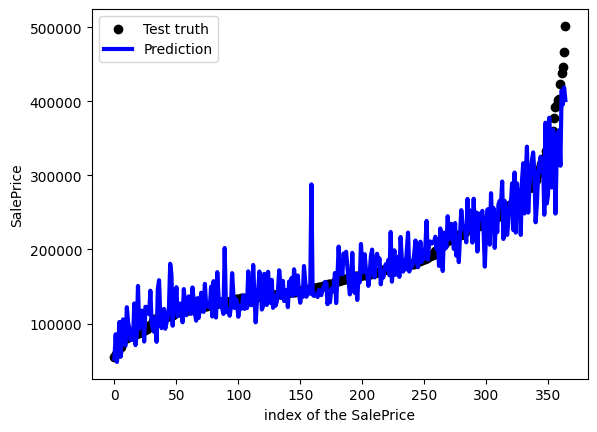

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))

rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

# Plot outputs
plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

### Target Encoding

In [ ]:
# The list of features to TargetEncode:
non_ordinal_features = ['Neighborhood',
                        'Alley',
                        'Condition1',
                        'Condition2',
                        'RoofStyle',
                        'RoofMatl',
                        'Exterior1st',
                        'Exterior2nd',
                        'MasVnrType',
                        'Foundation',
                        'Heating',
                        'CentralAir',
                        'GarageType',
                        'GarageFinish',
                        'MiscFeature',
                        'SaleType',
                        'SaleCondition'
]

In [ ]:
# K Fold Target Encoding

from sklearn import base
from sklearn.model_selection import KFold


## TRAIN
class KFoldTargetEncoderTrain(base.BaseEstimator,
                               base.TransformerMixin):
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = True, random_state = 42)
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)
                                     [self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,self.targetName,                    
                   np.corrcoef(X[self.targetName].values,
                               encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X
    
## TEST
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,encodedName):
        
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        mean =  self.train[[self.colNames,
                self.encodedName]].groupby(
                                self.colNames).mean().reset_index() 
        
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})
        return X

In [ ]:
# Perform K Fold Target Enc

# train:
new_train = df_train.copy()
for feature in non_ordinal_features:
    targetc = KFoldTargetEncoderTrain(feature, 'SalePrice', n_fold=5, discardOriginal_col = False)
    new_train = targetc.fit_transform(new_train)

# test:
new_test = df_test.copy()
for feature in non_ordinal_features:
    test_targetc = KFoldTargetEncoderTest(new_train,
                                        feature,
                                        f'{feature}_Kfold_Target_Enc')
    new_test = test_targetc.fit_transform(new_test)

# Now that we have Target Encoded the features in the trainining set,
# and used the results in the training set to replicate the encoding on the test set
# we may remove the non Target Encoded original columns:

new_train.drop(labels= non_ordinal_features, inplace=True, axis = 1)
new_test.drop(labels= non_ordinal_features, inplace= True, axis = 1)

In [ ]:
df_train = new_train.drop(columns = ['SalePrice'])
df_submit = new_test

## Prepare the train/test split

Now let us split the dataset into training and testing datasets:

In [ ]:
from sklearn.preprocessing import StandardScaler

target_train = new_train['SalePrice'].values
new_train = StandardScaler().fit_transform(new_train.drop(columns = ['SalePrice']))


X_submit = StandardScaler().fit_transform(new_test)

print('new_train shape: {}'.format(new_train.shape))
print('target_train shape: {}'.format(target_train.shape))
print('X_submit shape: {}'.format(X_submit.shape))

# model definition

### Simple LinearRegression

This model performs poorly, score = 16.82345, rank = 5725/5727

In [ ]:
# We will begin with a Linear model
# and will add lasso to avoid co linearity (by reducing the number of features used hopefully)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))

rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

# Plot outputs
plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

It would be interesting to upload a prediction of house prices using this model and observe how bad the score is.

### LinearRegression woth L1 penalty (LASSO)

#### This model performs poorly but much better than regular Linear Regression, score = 0.16084, rank = 3751/5741

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = int(1e4), alpha = 1600, selection='random')

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# The coefficients
print("Coefficients: \n", lasso.coef_)
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))

rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

# Plot outputs
plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

### Ridge Regression (L2 penalty)

##### Not great when compared to Lasso, so feauture selection outweighs colinearity there. score = 0.16095, rank = 3755/5741

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1200)

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# The coefficients
print("Coefficients: \n", ridge.coef_)
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))

rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

# Plot outputs
plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

## ElasticNet (L1 and L2 penalty with CV grid search for optimal hyperparameters)

### Best linear model, score = 0.15883, rank = 3706/5741

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
from sklearn.linear_model import ElasticNetCV

el_net = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
    n_alphas=1000
    )

el_net.fit(X_train, y_train)

y_pred = el_net.predict(X_test)

print(f'Alpha_opt: {el_net.alpha_}')
print(f'l1_ratio_opt: {el_net.l1_ratio_}')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# The coefficients
print("Coefficients: \n", el_net.coef_)
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))

rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]


# Feauture importance
fig, ax = plt.subplots()

sorted_coefs = sorted(enumerate(el_net.coef_), key = lambda x: -abs(x[1])) # this is a list of (idx, val) of coefficients sorted in descending order of absolute value
last_idx = 0
while abs(sorted_coefs[last_idx][1]) > 0.5*sorted_coefs[0][1]: # the top 90% of coefficients
    last_idx += 1

ax.barh(df_train.columns[[id for id, _ in sorted_coefs[:last_idx]]], el_net.coef_[[id for id, _ in sorted_coefs[:last_idx]]], align='center')

#ax.set_yticks(y_pos, labels=people)]
ax.invert_yaxis()
ax.set_xlabel('Coef value')
ax.set_title('Top 50% of features by size of coefficient')

plt.show()
# Plot outputs
plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

## Polynomial (degree = 2) with L1 regularization (feature selection)

#### This improves on ElasticNet, indicating the presence of non linear relationships between the variables and the target as well as the benefit of feature selection. score = 0.15744, rank = 3676/5741

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
new_train_poly = poly.fit_transform(new_train)
X_submit_poly = poly.fit_transform(X_submit)

var_names = poly.get_feature_names_out(input_features=df_train.columns)

X_train, X_test, y_train, y_test = train_test_split(new_train_poly, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
from sklearn.linear_model import LassoCV

poly_lasso = LassoCV(
        # n_alphas = 10,
        alphas = [1500 + c for c in range(100, 3100, 100)],
        cv = 5
    )

poly_lasso.fit(X_train, y_train)

y_pred = poly_lasso.predict(X_test)

print(f'Alpha_opt: {poly_lasso.alpha_}')
#print(f'l1_ratio_opt: {poly_lasso.l1_ratio_}')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# The coefficients
print("Coefficients: \n", poly_lasso.coef_)
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))



# Plot outputs

# Feauture importance
fig, ax = plt.subplots()

sorted_coefs = sorted(enumerate(poly_lasso.coef_), key = lambda x: -abs(x[1])) # this is a list of (idx, val) of coefficients sorted in descending order of absolute value
last_idx = 0
while abs(sorted_coefs[last_idx][1]) > 0.1*sorted_coefs[0][1]: # the top 90% of coefficients
    last_idx += 1

ax.barh(var_names[[id for id, _ in sorted_coefs[:last_idx]]], poly_lasso.coef_[[id for id, _ in sorted_coefs[:last_idx]]], align='center')
#ax.set_yticks(y_pos, labels=people)]
ax.invert_yaxis()
ax.set_xlabel('Coef value')
ax.set_title('Top 90% of features by size of coefficient')

plt.show()


# Truth vs Pred
rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

## Support Vector Regression : a regression techniques that relies on the max-margin principle. It optimizes the choice of support vectors (data samples) to use as hyper plan deifnition to create a regression line that minimises the eucliden distance to data.

score =  0.17846, rank = ?/5741

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel = 'rbf', C = 100000)

svr_rbf.fit(X_train, y_train)

y_pred = svr_rbf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# The coefficients
print("Coefficients: \n", svr_rbf.get_params())
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))


# Plot outputs


# Truth vs Pred
rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

## DecisionTree Regression

score =  0.19562, rank = ?/5741

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dec_tree_regr = DecisionTreeRegressor()

# Create the hyperparameter grid
param_grid = {
    'max_depth': [3,4,5,6,7,8,10,15,30],
    'min_samples_leaf': [1,2,3,5,10,20],
    'max_features': [None, 'sqrt', 'log2'],
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dec_tree_regr, param_grid=param_grid, cv=10,)

# Fit the GridSearchCV model
grid_search.fit(X_train, y_train)

# Print the best parameters and best accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

dec_tree_regr = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

# The coefficients
print("Coefficients: \n", dec_tree_regr.get_params())
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))


# Plot outputs

# Feature Importance
ft_importance = permutation_importance(dec_tree_regr, X_train, y_train, n_repeats=10)
ft_importance= pd.DataFrame(data = {'ft_name': df_train.columns, 'ft_score': ft_importance['importances_mean']})
ft_importance.sort_values(by = 'ft_score', ascending = False, inplace=True)
#print(ft_importance)
#print(df_train.columns)
fig, ax = plt.subplots()

score_cutoff = 0
score_mask =  ft_importance['ft_score'] > score_cutoff
ax.barh(ft_importance['ft_name'][score_mask], ft_importance['ft_score'][score_mask], align='center')
#ax.set_yticks(y_pos, labels=people)]
ax.invert_yaxis()
ax.set_xlabel('Score (likely Gini purity)')
ax.set_title('Decsion Tree feature importance')

plt.show()

# Truth vs Pred
rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

## Gradient Boosting Machine
### Align sequentially weak learners (Decision Trees for ex) to learn the loss.
### same as XGBoost without auto cross validation, and regularization, and auto paralellization for imporved fitting speed

score = 0.14424, rank = 2589/5741

In [13]:
target = np.log(df_target)

In [16]:
np.squeeze(target.values)

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

In [17]:
from sklearn.model_selection import train_test_split

target = np.log(df_target)

X_train, X_test, y_train, y_test = train_test_split(scaled_train, np.squeeze(target.values) random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (580181179.py, line 5)

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 80, 100,],
    'min_samples_leaf': [1, 2, 3, 5,],
    'max_depth': [1, 3, 5, 8],
}

selector = GridSearchCV(gbm, param_grid=param_grid, cv = 5, verbose = 4) # 4 is max verbosity

selector.fit(X_train, y_train)

gmb = selector.best_estimator_
best_params = selector.best_params_
best_score = selector.best_score_

print('Best parameters: ', best_params)
print('Best score: ', best_score)

gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, n_estimators=50;, score=0.344 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, n_estimators=50;, score=0.332 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, n_estimators=50;, score=0.267 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, n_estimators=50;, score=0.275 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, n_estimators=50;, score=0.286 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, n_estimators=80;, score=0.460 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, n_estimators=80;, score=0.443 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, n_estimators=80;, score=0.373 total time=   0.1s
[CV 4/5] END learn

Coefficients: 
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Mean squared error: 5.88553e+08' 
R^2: 0.89


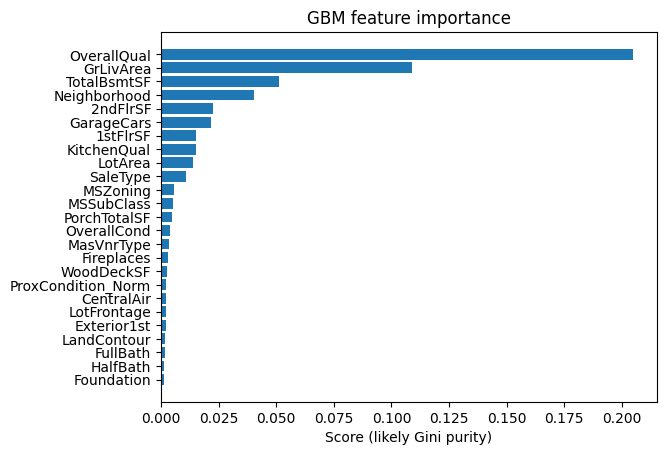

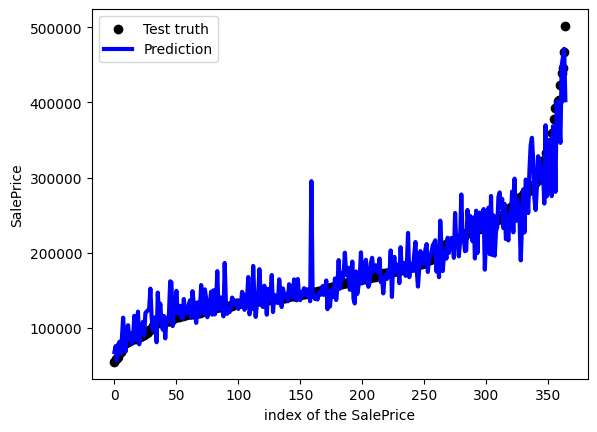

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

# The coefficients
print("Coefficients: \n", gbm.get_params())
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))


# Plot outputs

# Feature Importance
ft_importance = permutation_importance(gbm, X_train, y_train, n_repeats=10)
ft_importance= pd.DataFrame(data = {'ft_name': df_train.columns, 'ft_score': ft_importance['importances_mean']})
ft_importance.sort_values(by = 'ft_score', ascending = False, inplace=True)
#print(ft_importance)
#print(df_train.columns)
fig, ax = plt.subplots()

score_cutoff = .001
score_mask =  ft_importance['ft_score'] > score_cutoff
ax.barh(ft_importance['ft_name'][score_mask], ft_importance['ft_score'][score_mask], align='center')
#ax.set_yticks(y_pos, labels=people)]
ax.invert_yaxis()
ax.set_xlabel('Score (likely Gini purity)')
ax.set_title('GBM feature importance')

plt.show()

# Truth vs Pred
rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

## XGBoost
#### with built in regularization, cross validation, better stopping criterion

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 80, 100, 150, 200],
    'max_depth': [1, 3, 5, 8],
}

selector = GridSearchCV(xgb, param_grid=param_grid, cv = 3, verbose = 4)

selector.fit(X_train, y_train)

xgb = selector.best_estimator_
xgb.fit(X_train, y_train)

best_params = selector.best_params_
best_score
print('Best parameters: ', best_params)
print('Best score: ', best_score)

y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

# The coefficients
print("Coefficients: \n", xgb.get_params())
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))


# Plot outputs

# Feature Importance
ft_importance = permutation_importance(xgb, X_train, y_train, n_repeats=10)
ft_importance= pd.DataFrame(data = {'ft_name': df_train.columns, 'ft_score': ft_importance['importances_mean']})
ft_importance.sort_values(by = 'ft_score', ascending = False, inplace=True)
#print(ft_importance)
#print(df_train.columns)
fig, ax = plt.subplots()

score_cutoff = .001
score_mask =  ft_importance['ft_score'] > score_cutoff
ax.barh(ft_importance['ft_name'][score_mask], ft_importance['ft_score'][score_mask], align='center')
#ax.set_yticks(y_pos, labels=people)]
ax.invert_yaxis()
ax.set_xlabel('Score (likely Gini purity)')
ax.set_title('XGB feature importance')

plt.show()

# Truth vs Pred
rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

# Feature Dimensionalty Reduction
The visible noise of the regresison lines suggests noise fitting. Or overfitting.
We should reduce the number of dimensions in the feature space. 


## Principal Component Analysis

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
# Make a funciton that performs PCA with variying n_components between 1 and n_features
from sklearn.decomposition import PCA

def get_expl_var(X, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    ratio_explained_variance = sum(pca.explained_variance_ratio_)
    return ratio_explained_variance

# Plot an explained variance plot for n_components from 1 to n_features

def expl_var_vs_n_feature(X):
    n_features = X.shape[1]
    expl_var = []
    for i in range(1, n_features + 1):
        expl_var.append(
            get_expl_var(X, i)
        )
    return np.array(expl_var)



In [ ]:
# Get the arary of explained variance ratio for out dataset:
expl_var = expl_var_vs_n_feature(X_train)

# Plot expl_var against n_components
n_features = X_train.shape[1]
n_components = np.arange(1, n_features+1)

fig, ax = plt.subplots()
ax.set_xlabel('n_components')
ax.set_ylabel('Ratio of explained varaince')
ax.set_title('PCA - Ratio of explained variance vs n_components for House Prices')


ax.plot(n_components, expl_var)
ax.plot(n_components, [0.8]*len(n_components), linestyle = 'dashed', color = 'red')
fig.show()

# Now let's look at a scree plot of the explained variance of eigenvalues:
cov_mat = PCA(n_components=n_features) 
cov_mat.fit(X_train)
eigenvalues = cov_mat.explained_variance_

fig, ax = plt.subplots()
fig.set_figwidth(10)
ax.set_xlabel('Eigenvector')
ax.set_ylabel('Eigenvalue')
ax.set_title('PCA - Explained varience per eignevector')

ax.plot(n_components, eigenvalues)
ax.plot(n_components, [2]*len(n_components), linestyle = 'dashed', color = 'red') # eigenvalue = 2 looks to be the knee point
fig.show()

Scree plot is clear: around y = 2 there's a knee point, let's find out which n_components this corresponds to:

In [ ]:
target_eigenval = 2.0

i = 0
while i < len(eigenvalues) and eigenvalues[i]> 2.0:
    i += 1
print('The number of eigenvectors of the PCA is : ', i + 1)

# GBM with PCA and 8 components 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train, target_train, random_state=4, train_size = None)
# by default the train/test split is 0.75/0.25

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

In [ ]:
# PCA step
n_useful_components = 8

from sklearn.decomposition import PCA

pca = PCA(n_components=n_useful_components)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

X_submit_pca = pca.transform(X_submit)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 80, 100,],
    'min_samples_leaf': [1, 2, 3, 5,],
    'max_depth': [1, 3, 5, 8],
}

selector = GridSearchCV(gbm, param_grid=param_grid, cv = 5, verbose = 4) # 4 is max verbosity

selector.fit(X_train, y_train)

gmb = selector.best_estimator_
best_params = selector.best_params_
best_score = selector.best_score_

print('Best parameters: ', best_params)
print('Best score: ', best_score)

gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

# The coefficients
print("Coefficients: \n", gbm.get_params())
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):n}' " % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))


# Plot outputs

# Feature Importance
ft_importance = permutation_importance(gbm, X_train, y_train, n_repeats=10)
ft_importance= pd.DataFrame(data = {'ft_name': [f'Eigenvector {i+1}' for i in range(n_useful_components)], 'ft_score': ft_importance['importances_mean']})
ft_importance.sort_values(by = 'ft_score', ascending = False, inplace=True)
#print(ft_importance)
#print(df_train.columns)
fig, ax = plt.subplots()

score_cutoff = .001
score_mask =  ft_importance['ft_score'] > score_cutoff
ax.barh(ft_importance['ft_name'][score_mask], ft_importance['ft_score'][score_mask], align='center')
#ax.set_yticks(y_pos, labels=people)]
ax.invert_yaxis()
ax.set_xlabel('Score (likely Gini purity)')
ax.set_title('GBM feature importance')

plt.show()

# Truth vs Pred
rng_y_test = [[y, idx] for idx, y in enumerate(y_test)]
rng_y_test.sort()
index_order = [elt[1] for elt in rng_y_test]
y_test_sorted = [elt[0] for elt in rng_y_test]

plt.scatter(np.arange(len(y_test)), y_test_sorted, color="black", label= "Test truth")
plt.plot(np.arange(len(y_test)), y_pred[index_order], color="blue", linewidth=3, label = "Prediction")

plt.xlabel('index of the SalePrice')
plt.ylabel('SalePrice')

plt.legend()

plt.show()

## Select a Model

There are several tree-based models for you to choose from.

* RandomForestModel
* GradientBoostedTreesModel
* CartModel
* DistributedGradientBoostedTreesModel

To start, we'll work with a Random Forest. This is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use.

We can list the all the available models in TensorFlow Decision Forests using the following code:

In [ ]:
tfdf.keras.get_all_models()

## How can I configure them?

TensorFlow Decision Forests provides good defaults for you (e.g. the top ranking hyperparameters on our benchmarks, slightly modified to run in reasonable time). If you would like to configure the learning algorithm, you will find many options you can explore to get the highest possible accuracy.

You can select a template and/or set parameters as follows:

```rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)```

Read more [here](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel).

## Create a Random Forest

Today, we will use the defaults to create the Random Forest Model while specifiyng the task type as `tfdf.keras.Task.REGRESSION`.

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

## Train the model

We will train the model using a one-liner.

Note: you may see a warning about Autograph. You can safely ignore this, it will be fixed in the next release.

In [ ]:
rf.fit(x=train_ds)

## Visualize the model
One benefit of tree-based models is that you can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

## Evaluate the model on the Out of bag (OOB) data and the validation dataset

Before training the dataset we have manually seperated 20% of the dataset for validation named as `valid_ds`.

We can also use Out of bag (OOB) score to validate our RandomForestModel.
To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB).
OOB score is computed on the OOB data.

Read more about OOB data [here](https://developers.google.com/machine-learning/decision-forests/out-of-bag).

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.

Note: Smaller values are better for this hyperparameter.

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

We can also see some general stats on the OOB dataset:

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Now, let us run an evaluation using the validation dataset.

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

## Variable importances

Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests.
Let us list the available `Variable Importances` for Decision Trees:

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

As an example, let us display the important features for the Variable Importance `NUM_AS_ROOT`.

The larger the importance score for `NUM_AS_ROOT`, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

Plot the variable importances from the inspector using Matplotlib

In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

# Submission
Finally predict on the competition test data using the model.

In [22]:
def submit_prediction(model, x_submit):
    preds = np.exp(model.predict(x_submit))
    output = pd.DataFrame({'Id': pd.Index([i for i in range(1461, 2920)]),
                        'SalePrice': preds.squeeze()})
    print(output.head())

    output.to_csv('./out/submission.csv', index = False)


In [23]:
x_submit = scaled_test.set_index(pd.Index([i for i in range(1461, 2920)]))
submit_prediction(gbm, x_submit)

     Id  SalePrice
0  1461        inf
1  1462        inf
2  1463        inf
3  1464        inf
4  1465        inf


/var/folders/54/l3922hpj5_9ct1rg7_8w8d080000gn/T/ipykernel_7060/3708277903.py:2: RuntimeWarning: overflow encountered in exp
  preds = np.exp(model.predict(x_submit))


In [46]:
x_submit

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,SaleType,PorchTotalSF,ProxCondition_Norm,BldgType_Is_1Fam,Heating_Is_GasA,HeatingQC_Is_OK
1461,0.124330,-2.043948,0.465787,0.184371,0.058785,0.237192,-0.732285,-0.077654,-0.000003,-0.262006,...,-1.027003,-0.936496,0.324017,0.365916,-0.302034,0.285030,-2.475661,0.450538,0.124058,0.491304
1462,0.124330,0.454558,0.511107,0.519791,0.058785,0.237192,1.180068,-0.077654,-0.000003,-0.262006,...,-1.027003,-0.936496,0.324017,2.365838,-0.302034,-0.493582,0.400171,0.450538,0.124058,0.491304
1463,1.526526,0.454558,0.193864,0.464374,0.058785,0.237192,1.180068,-0.077654,-0.000003,-0.262006,...,0.973266,0.057514,0.324017,0.935064,-0.302034,-0.512120,0.400171,0.450538,0.124058,-2.016451
1464,1.526526,0.454558,0.375146,-0.024109,0.058785,0.237192,1.180068,-0.077654,-0.000003,-0.262006,...,0.973266,0.057514,0.324017,2.104979,-0.302034,-0.493582,0.400171,0.450538,0.124058,0.491304
1465,0.521627,0.454558,-1.211071,-0.654748,0.058785,0.237192,1.180068,3.802355,-0.000003,-0.262006,...,-1.027003,0.057514,0.324017,-0.740760,-0.302034,1.267564,0.400171,-2.205769,0.124058,0.491304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-1.070646,-2.043948,-2.208122,-1.043937,0.058785,0.237192,-0.732285,-0.077654,-0.000003,-0.262006,...,-1.027003,-1.376038,0.324017,-0.740760,-0.302034,-0.827273,0.400171,-2.205769,0.124058,-2.016451
2916,-1.070646,-2.043948,-2.208122,-1.049263,0.058785,0.237192,-0.732285,-0.077654,-0.000003,-0.262006,...,-1.027003,-0.936496,0.324017,-0.740760,-0.302034,-0.604812,0.400171,-2.205769,0.124058,0.491304
2917,0.124330,0.454558,4.091426,1.246808,0.058785,0.237192,-0.732285,-0.077654,-0.000003,-0.262006,...,0.973266,0.057514,0.324017,3.006130,-0.302034,-0.827273,0.400171,0.450538,0.124058,0.491304
2918,-0.835649,0.454558,-0.349982,0.034605,0.058785,0.237192,-0.732285,-0.077654,-0.000003,-0.262006,...,-1.027003,-1.376038,0.324017,-0.108374,-0.302034,-0.530659,0.400171,0.450538,0.124058,0.491304


In [47]:
gbm.predict(x_submit)

array([118373.79356812, 168616.39379337, 178081.01022325, ...,
       160692.63272406, 114461.29570913, 205709.3774096 ])